In [4]:
import os
from dataloading import dto, loadz

os.chdir(os.getcwd().split('/dataloading')[0])
loadz.produce('.data')
dataset = dto.wds_load(".data/test_data.tar.xz") + dto.wds_load(".data/train_data.tar.xz")

/home/fred/projects/soft-pointer-networks


Using custom data configuration default-data_dir=.data
Found cached dataset timit_asr (/home/fred/.cache/huggingface/datasets/timit_asr/default-data_dir=.data/0.0.0/43f9448dd5db58e95ee48a277f466481b151f112ea53e27f8173784da9254fb2)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [11]:
loadz.calculate_phoneme_counts(dataset)
loadz.calculate_phoneme_counts(dataset, 16)

39 duration: None
{'pau': 47588, 'ih': 18257, 'n': 11865, 's': 10114, 'iy': 9663, 'l': 9414, 'r': 9064, 'ah': 8630, 'aa': 8281, 'er': 7604, 'k': 6488, 't': 5899, 'm': 5600, 'ae': 5404, 'eh': 5293, 'z': 5046, 'd': 4793, 'w': 4379, 'dh': 3879, 'dx': 3649, 'p': 3545, 'sh': 3259, 'ay': 3242, 'uw': 3210, 'f': 3128, 'ey': 3088, 'b': 3067, 'ow': 2913, 'hh': 2835, 'g': 2772, 'v': 2704, 'y': 2349, 'ng': 1787, 'jh': 1581, 'ch': 1081, 'th': 1018, 'oy': 947, 'aw': 945, 'uh': 756}
23 duration: 16
{'b': 1543, 'd': 1515, 'pau': 443, 'k': 338, 'dh': 304, 'g': 300, 't': 282, 'p': 257, 'dx': 127, 'n': 111, 'm': 67, 'r': 44, 'ah': 36, 'ih': 31, 'w': 25, 'l': 14, 'y': 8, 'v': 6, 'ng': 3, 'th': 3, 'f': 2, 'hh': 1, 'jh': 1}


[   11   546  9291 17278 46945 96003  5729 59334] [   0    5   10   20   30   50  100  105 9999]


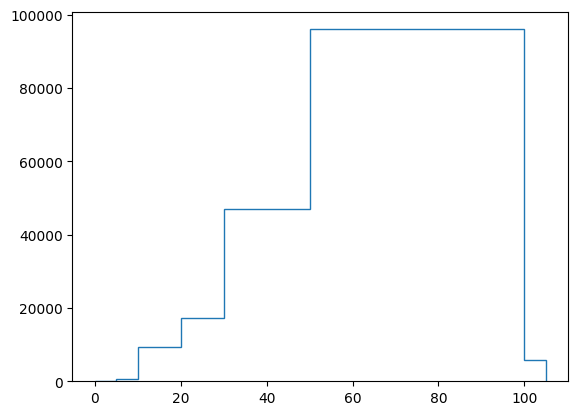

In [6]:
import numpy as np
import matplotlib.pyplot as plt

durations = [
    d
    for item in dataset
    for p, d in zip(item.phonetic_detail.utterance, item.phonetic_detail.duration)
]
counts, bins = np.histogram(durations, bins=[0, 5, 10, 20, 30, 50, 100, 105, 9999])
print(counts, bins)
plt.stairs(counts[:-1], bins[:-1])
plt.show()

0it [00:00, ?it/s]

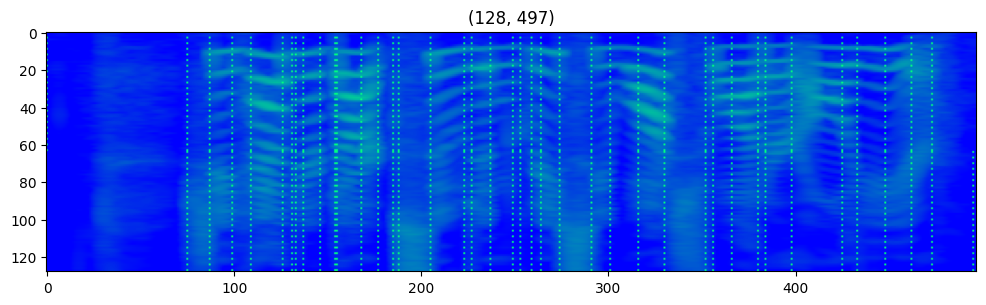

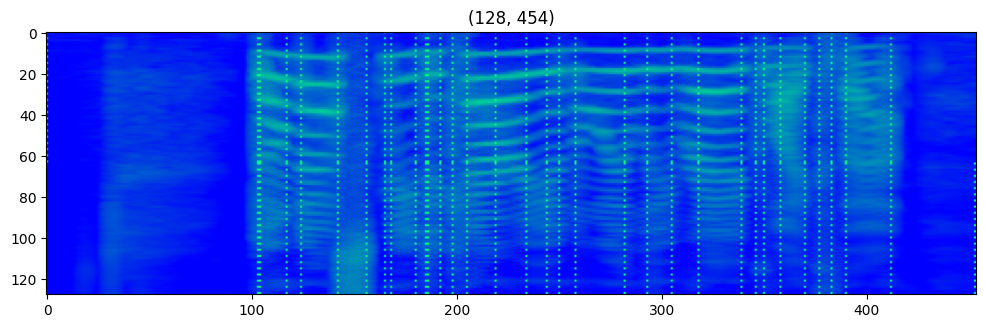

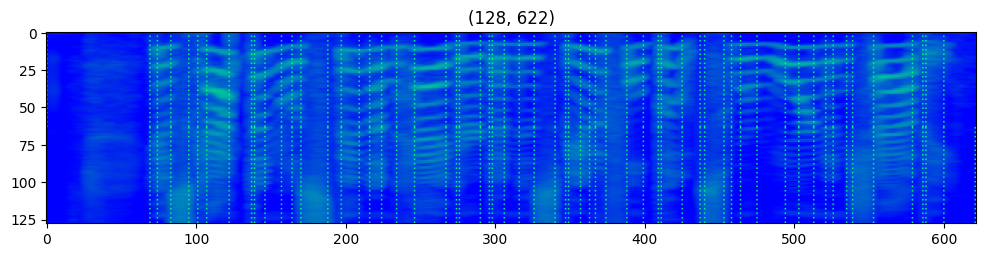

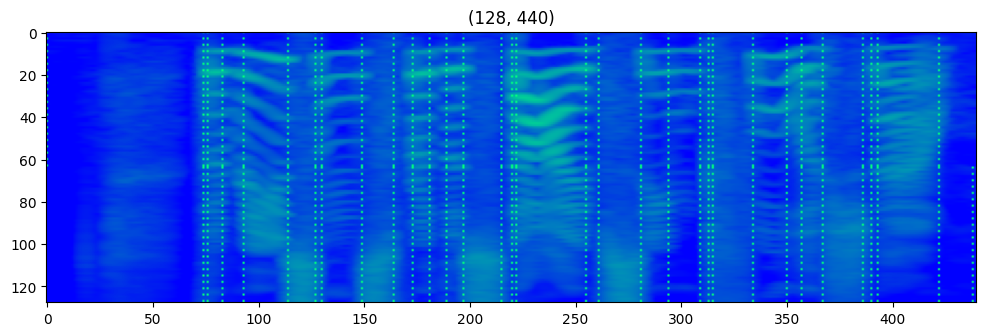

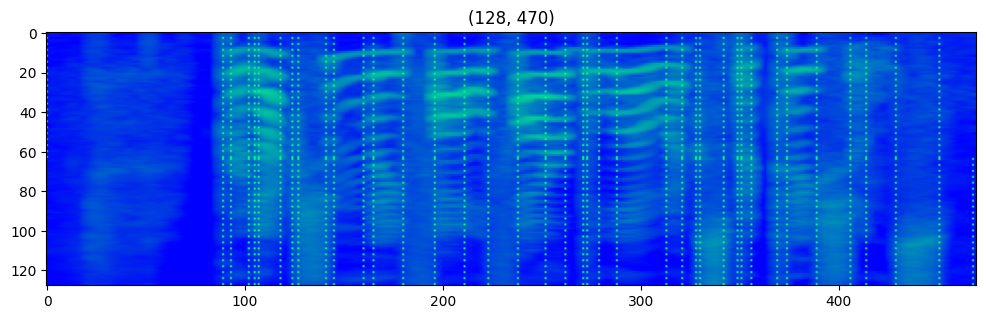

In [12]:
from dataloading.utils import spectogram, show_tensor

result = dto.wds_load(".data/test_data.tar.xz")

for i in range(5):
    data = result[i]

    logmel = spectogram(data.audio)
    val = logmel.max() * 2
    for word, stop_ms in zip(data.phonetic_detail.utterance, data.phonetic_detail.stop):
        logmel[64::3, int(stop_ms / (128 / data.msr))] = val

    for word, stop_ms in zip(data.phonetic_detail.utterance, data.phonetic_detail.start):
        logmel[:64:3, int(stop_ms / (128 / data.msr))] = val

    show_tensor(logmel, limit=False, figsize=(12, 4))